## Weather Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv('temps.csv')
data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
print('The shape of our dataset is', data.shape)

The shape of our dataset is (348, 12)


In [5]:
data.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


## _Visualization_

In [6]:
import datetime

#getting years, months and days
years= data.year
months= data.month
days= data.day


#turn to list and then convert to datetime object
dates= [str(int(year))+ '-' +str(int(month))+ '-' +str(int(day)) for year, month, day in zip(years, months, days)]
dates= [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

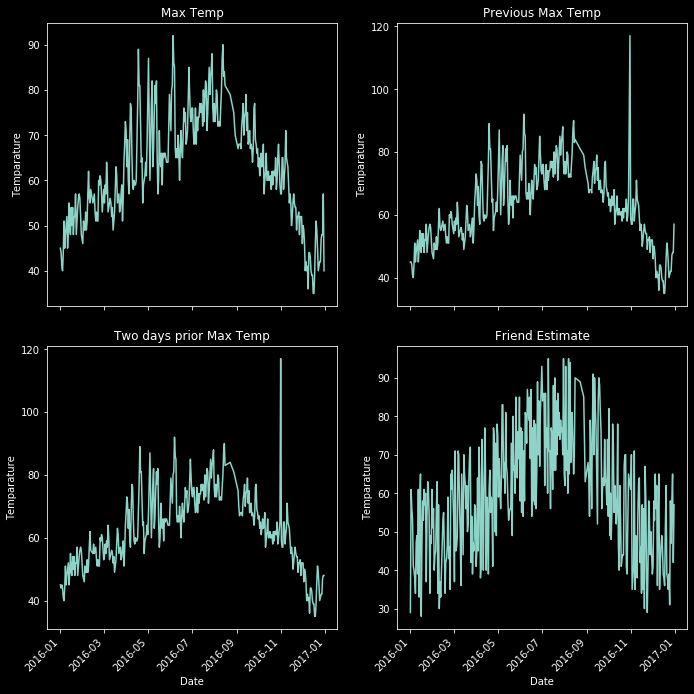

In [7]:
plt.style.use('dark_background')
'''Check other cool styles using plt.style.available to set a theme e.g dark_background, fivethirtyeight'''

#visualizing the data
#set up th eplotting layout
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.autofmt_xdate(rotation=45)

#actual max temp measurement
ax1.plot(dates, data['actual'])
ax1.set_xlabel('');
ax1.set_ylabel('Temparature');
ax1.set_title('Max Temp')

#Temparature from 1 day ago
ax2.plot(dates, data['temp_1'])
ax2.set_xlabel('');
ax2.set_ylabel('Temparature');
ax2.set_title('Previous Max Temp')

#Temparature from 2 days ago
ax3.plot(dates, data['temp_2'])
ax3.set_xlabel('Date');
ax3.set_ylabel('Temparature');
ax3.set_title('Two days prior Max Temp')

#Friend Estimate
ax4.plot(dates, data['friend'])
ax4.set_xlabel('Date');
ax4.set_ylabel('Temparature');
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [8]:
# one-hot encoding
data= pd.get_dummies(data)

In [9]:
data.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [10]:
print('shape of features after one-hot encoding is', data.shape)

shape of features after one-hot encoding is (348, 18)


## _Features and labels and convert data to arrays_

In [11]:
data.dtypes

year                int64
month               int64
day                 int64
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
week_Fri            uint8
week_Mon            uint8
week_Sat            uint8
week_Sun            uint8
week_Thurs          uint8
week_Tues           uint8
week_Wed            uint8
dtype: object

In [12]:
labels= np.array(data['actual'])

In [13]:
features= data.drop('actual', axis=1)


In [14]:
features_list= list(data.columns)
features= np.array(features)

## _Training and Testing sets_

In [15]:
len(data[data['month']>9])

91

In [16]:
train_all= data.copy()
train= train_all.loc[train_all.month<= 9]
valid= train_all.loc[train_all.month >9]
print(train.shape, valid.shape)

(257, 18) (91, 18)


In [17]:
target_col= features_list.pop(6)
in_cols= features_list


In [18]:
#Get our X and Y training and validation sets ready
X_train, y_train= train[in_cols], train[target_col]
X_valid, y_valid= valid[in_cols], valid[target_col]

In [19]:
print('Training Features Shape: ', X_train.shape)
print('Training Labels Shape: ', y_train.shape)
print('Testing Features Shape: ', X_valid.shape)
print('Testing Labels Shape: ', y_valid.shape)

Training Features Shape:  (257, 17)
Training Labels Shape:  (257,)
Testing Features Shape:  (91, 17)
Testing Labels Shape:  (91,)


## _Establish Baseline_

In [20]:
#Using scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split data into training and testing sets
train_features, test_features, train_labels, test_labels= train_test_split(features, labels, 
                                                                          test_size=0.25, random_state= 42)


In [21]:
#The baseline predictions are the historical averages
baseline_preds= test_features[:, features_list.index('average')]

#Baseline errors, and average average baseline error
baseline_errors= abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.06 degrees.


## _Train Model_

In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#Instantiate model
rf= RandomForestRegressor(n_estimators=1000, random_state=42)

#Train the model on training data
rf.fit(X_train, y_train);

## _Make Predictions_

In [23]:
# Use the forest's predict method on the test data
predictions= rf.predict(X_valid)

#calculate the absolute errors
errors= abs(predictions - y_valid)

# print out the main absolute error MAE
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degree.')

Mean Absolute Error: 3.57 degree.


In [24]:
# Calculate mean absolute percentage error MAPE
mape= 100*(errors / y_valid)

#Calculate and display accuracy
accuracy= 100-np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 92.92 %.


Now, we intend to improve our model using hyperparameter tuning

How:
We try to narrow down the best parameters using randomized search then using grid search, we search for better parameters
using the estimates gotten from the randomized search

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import pprint

In [28]:
bootstrap= [True, False]
max_depth= [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)
n_estimators= [int(x) for x in np.linspace(100, 2000, 11)]
max_features= ['auto', 'sqrt']
min_samples_split= [i for i in range(1,10,2)]
min_samples_leaf= [i for i in range(1,10,2)]

param_distribution= {'bootstrap': bootstrap , 'max_depth':max_depth, 'n_estimators': n_estimators,
                    'max_features': max_features, 'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf}

pprint.pprint(param_distribution)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 7, 9],
 'min_samples_split': [1, 3, 5, 7, 9],
 'n_estimators': [100, 290, 480, 670, 860, 1050, 1240, 1430, 1620, 1810, 2000]}


In [30]:
random_grid= RandomizedSearchCV(rf, param_distributions= param_distribution, cv= 3, n_iter=100, verbose=3, random_state=1
                               ,n_jobs=-1)

random_grid.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                             

In [31]:
pprint.pprint(random_grid.best_params_)

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 1430}


In [32]:
random_grid.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=1430, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [37]:
from sklearn.metrics import mean_absolute_error, accuracy_score
y_pred= random_grid.predict(X_valid)
print(f'Baseline Error: {round(mean_absolute_error(y_pred, y_valid),2)} degrees')

#Calculate and display accuracy
errors= np.mean(abs(y_pred-y_valid))
mape= 100*(errors /y_valid)
accuracy= 100-np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Baseline Error: 3.85 degrees
Accuracy: 92.63 %.


In [45]:
def evaluate(model,test_features,test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print("Model Performance")
    print("Mean Absolute Error: {:0.2f} degrees.".format(np.mean(errors)))
    print("Accuracy= {:0.2f}%.".format(accuracy))
    #print Improvement
    acc = 92.92
    print("Accuracy from",acc,"% to",round(accuracy,2),"%")
    print("Improvement: {}%".format(round((accuracy-acc)/acc * 100,2)))
    
    return "Accuracy: ",accuracy
evaluate(random_grid, X_valid, y_valid)

Model Performance
Mean Absolute Error: 3.85 degrees.
Accuracy= 92.46%.
Accuracy from 92.92 % to 92.46 %
Improvement: -0.49%


('Accuracy: ', 92.46046609288709)

Not our Bus-Stop

In [48]:
from sklearn.ensemble import RandomForestClassifier
param_grid= {'bootstrap': [True, False],
 'max_depth': [100, None],
 'max_features': ['auto'],
 'min_samples_leaf': [9, 12, 15, 20],
 'min_samples_split': [8, 9, 12, 20],
 'n_estimators': [1400, 1430, 1500, 2000]}
rf2= RandomForestClassifier()

grid= GridSearchCV(estimator=rf2, param_grid= param_grid, n_jobs=-1, verbose=3, cv=3)
grid.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 29.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
pprint.pprint(grid.best_params_)

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 1430}


In [50]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=1430,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import mean_absolute_error, accuracy_score
y_pred2= grid.predict(X_valid)
print(f'Baseline Error: {round(mean_absolute_error(y_pred2, y_valid),2)} degrees')

#Calculate and display accuracy
errors= np.mean(abs(y_pred2-y_valid))
mape= 100*(errors /y_valid)
accuracy= 100-np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Baseline Error: 5.29 degrees
Accuracy: 89.88 %.


In [52]:
def evaluate(model,test_features,test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print("Model Performance")
    print("Mean Absolute Error: {:0.2f} degrees.".format(np.mean(errors)))
    print("Accuracy= {:0.2f}%.".format(accuracy))
    #print Improvement
    acc = 92.92
    print("Accuracy from",acc,"% to",round(accuracy,2),"%")
    print("Improvement: {}%".format(round((accuracy-acc)/acc * 100,2)))
    
    return "Accuracy: ",accuracy
evaluate(grid, X_valid, y_valid)

Model Performance
Mean Absolute Error: 5.29 degrees.
Accuracy= 89.53%.
Accuracy from 92.92 % to 89.53 %
Improvement: -3.65%


('Accuracy: ', 89.52711077362697)

Conclusion:
    We'd stick with the random search best paramters that's an improvement

In [ ]:
#Train the model on training data
rf = RandomForestRegressor(n_estimators= 50,
                          max_features= 'auto',
                          max_depth= 70,
                          min_samples_split= 7,
                          min_samples_leaf= 2,
                          bootstrap= True)

rf.fit(X_train, y_train)
evaluate(rf, test_features,test_labels)